<a href="https://colab.research.google.com/github/Sri200522/fake-news-detection/blob/main/Copy_of_fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle pandas numpy
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import numpy as np
import pandas as pd

# Correct the file path (if this is for Colab, the file should be in /content/)
file_path = "/content/fake_and_real (Autosaved).xlsx"

# Load the dataset
try:
    df = pd.read_excel(file_path)  # Corrected function
    # Print the shape of the DataFrame
    print("Shape of the DataFrame:", df.shape)

    # Display the first 5 rows of the DataFrame
    print("First 5 rows of the DataFrame:")
    print(df.head(5))
except FileNotFoundError:
    print(f"Error: File not found at path: {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")


Shape of the DataFrame: (9900, 2)
First 5 rows of the DataFrame:
                                                Text label
0   Top Trump Surrogate BRUTALLY Stabs Him In The...  Fake
1  U.S. conservative leader optimistic of common ...  Real
2  Trump proposes U.S. tax overhaul, stirs concer...  Real
3   Court Forces Ohio To Allow Millions Of Illega...  Fake
4  Democrats say Trump agrees to work on immigrat...  Real


In [ ]:
df['label'].value_counts()

,count
label,
Fake,5000
Real,4900


In [ ]:
df['label_num'] = df['label'].map({'Fake' : 0, 'Real': 1})

# check the results with top 5 rows
df.head(5)

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [ ]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [ ]:
df['vector'] = df['Text'].apply(lambda text: nlp(text).vector)

In [ ]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[-0.6698782, 1.413862, -2.385709, -0.43160114,..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[-1.567909, 1.1591597, -2.4433732, 1.079182, 3..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[-2.0181959, 0.07993176, -2.50084, 0.89226085,..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[-2.7812982, -0.16120885, -1.609772, 1.3624227..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-2.284392, 0.883952, -2.5402825, 1.1069751, 4..."


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022
)

In [ ]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)

MultinomialNB()

In [ ]:
from sklearn.metrics import classification_report

y_pred = clf.predict(scaled_test_embed)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1024
           1       0.91      0.93      0.92       956

    accuracy                           0.93      1980
   macro avg       0.93      0.93      0.93      1980
weighted avg       0.93      0.93      0.93      1980



In [ ]:
from  sklearn.neighbors import KNeighborsClassifier

#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)

#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1024
           1       0.96      0.98      0.97       956

    accuracy                           0.97      1980
   macro avg       0.97      0.97      0.97      1980
weighted avg       0.97      0.97      0.97      1980



Text(95.72222222222221, 0.5, 'Truth')

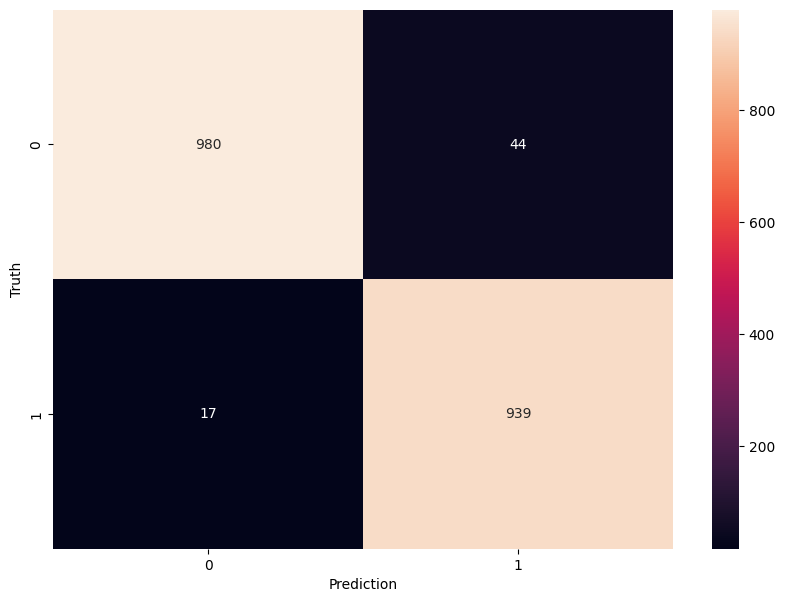

In [ ]:
#finally print the confusion matrix for the best model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')